-----

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos



## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

al momento de revisar la información de los df me di cuenta que estaban separados por ; en vez de , por lo que procedí a utilizar (sep=";") y así ya poder tener la información en el formato correcto.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# leer conjuntos de datos en los DataFrames
iodf=pd.read_csv("instacart_orders.csv",sep=";")
pdf=pd.read_csv("products.csv",sep=";")
opdf=pd.read_csv("order_products.csv",sep=";")
adf=pd.read_csv("aisles.csv",sep=";")
ddf=pd.read_csv("departments.csv",sep=";")

In [3]:
# mostrar información del DataFrame
print(iodf.info())
print("\n")
print("--------Filas------")
print("\n")
print(iodf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


--------Filas------


   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2    

In [4]:
# mostrar información del DataFrame
print(pdf.info())
print("\n")
print("--------Filas------")
print("\n")
print(pdf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


--------Filas------


   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3         

In [5]:
# mostrar información del DataFrame
print(opdf.info())
print("\n")
print("--------Filas------")
print("\n")
print(opdf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


--------Filas------


   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [6]:
# mostrar información del DataFrame
print(adf.info())
print("\n")
print("--------Filas------")
print("\n")
print(adf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


--------Filas------


   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
# mostrar información del DataFrame
print(ddf.info())
print("\n")
print("--------Filas------")
print("\n")
print(ddf.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


--------Filas------


   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Los df principales son "instacart_orders" y order_poducts". Los demás sirven como información complementaria al análisis.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

1.- Revisar si existen datos duplicados.
2.- Corroborar que no se necesiten estos datos en el df
3.- Eliminamos duplicados una vez se revisen.
4.- Comprobamos que se hayan eliminado.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
#Borré los nulos por error y los regresé

iodf['days_since_prior_order'] = iodf['days_since_prior_order'].replace("Na", np.nan)

print(iodf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [9]:
# Revisa si hay pedidos duplicados
print(iodf["order_id"].duplicated().sum())


15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? 

Aparecen como duplicadas y tienen en comun el dia y hora

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pm2=iodf.query("order_dow==3 and order_hour_of_day==2")
print(pm2)
print(pm2["order_dow"].value_counts())
print(pm2["order_hour_of_day"].value_counts())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

que no hay error en relacion al dia y la hora dsel miercoles a las 2

In [11]:
# Elimina los pedidos duplicados
iodf=iodf.drop_duplicates(subset="order_id").reset_index(drop=True)


In [12]:
# Vuelve a verificar si hay filas duplicadas
print(iodf.duplicated().sum())

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(iodf["order_id"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Encontré unos valores duplicados en el df solamente los eliminé

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print(pdf.duplicated().sum())

0


In [15]:
# Revisa únicamente si hay ID de productos duplicados
print(pdf["product_id"].duplicated().sum())

0


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
pdf["product_name"]=pdf["product_name"].str.upper()
print(pdf["product_name"].duplicated().sum())

1361


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
#voy a aplicar dos filtros.
    #solo muestro los valores que estén duplicados y que no sean nulos

#ya había reemplazado los valores nulos por unknown abajo antes de realzar este porque no le habia entendido a lo que pedian.
pdf_nonull_dup = pdf[(pdf["product_name"] != "Unknown") & (pdf.duplicated(subset="product_name", keep=False))]
print(pdf_nonull_dup["product_name"].value_counts().sort_values(ascending=False))


GREEN TEA WITH GINSENG AND HONEY                            3
CAULIFLOWER HEAD                                            2
GENTLE AND PREDICTABLE OVERNIGHT RELIEF LAXATIVE TABLETS    2
CREAM OF TARTAR                                             2
DRINKING WATER                                              2
                                                           ..
FAMILY SIZE LASAGNA WITH MEAT & SAUCE                       2
ORIGINAL POTATO CHIPS                                       2
CHOPPED GARLIC IN WATER                                     2
COOKIES 'N CREAM ICE CREAM                                  2
CHILI WITH BEANS                                            2
Name: product_name, Length: 103, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Identifique que había valores duplicados en la columna de product_name sin embargo no me siento seguo de eliminarlos por si en otro df cita el product_id de este.
supongo que puede ser por uin error de sistema o humano al momentoi de dar productos de alta y sobreescribir la información en vez de revisar primero si ese producto ya está registrado.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(ddf.duplicated().sum())

0


In [19]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(ddf["department_id"].duplicated().sum())
print(ddf["department"].duplicated().sum())

0
0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Nada, no había datos dupllicados

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(adf.duplicated().sum())

0


In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
adf["aisle"]=adf["aisle"].str.upper()
print(adf["aisle"].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Convertí la columna de aisle en mayusculas para ver si habia valores duplicados pero no hay., así que no haré nada

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(opdf.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(opdf.info())
print(opdf.head(50))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None
    order_id  product_id  add_to_cart_order  reordered
0    2141543       11440               17.0          0
1     567889        1560                1.0          1
2    2261212       26683                1.0          1
3     491251        8670               35.0          1
4    2571142        1940                5.0          1
5    2456893       21616                4.0          1
6     644579       12341                5.0          1
7    2231852       44925               10.0          1
8    3185766       36259               14.0          1
9     420019       23315                4.0          1
10    925051        9421          

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No encontré nada sospechoso

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
print(pdf["product_name"].isna().sum())

1258


Describe brevemente cuáles son tus hallazgos.
existen 1258 filas donde no se le asigno un valor en la columna "product_name"

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
pdf_pn_null=pdf[pdf["product_name"].isnull()]

print(pdf_pn_null["aisle_id"].unique())

[100]


Describe brevemente cuáles son tus hallazgos.

Si, todos los valores NaN que se tienen en la columna "product_name" corresponden al "aisle_id" 100

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(pdf_pn_null["department_id"].unique())

[21]


Describe brevemente cuáles son tus hallazgos.

Si, los valores nulos de "product_name" están relacionacionados exclusivamente con el dpto 21

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(adf.query("aisle_id==100"))
print(ddf.query("department_id==21"))
print("\n")
print(pdf_pn_null.head())

    aisle_id    aisle
99       100  MISSING
    department_id department
20             21    missing


     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21


Describe brevemente cuáles son tus hallazgos.
los valores Nulos de product_name están así porque no existe un nombre asignado en aisle ni en dpto. Quedaría pendiente si tienen actividad en las ventas o si son datos rezagados.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
pdf["product_name"].fillna("Unknown",inplace=True)
print(pdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para continuar con la forma en la que se manejaron los dastos se decidió cambiar el valor de los nulos a "Unknown" para poder tener la informacióon de una manera estandarizada

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(iodf.isna().sum())
master_orders=iodf.merge(opdf,on="order_id",how="left")



order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [30]:
iodf_null=iodf[iodf["days_since_prior_order"].isnull()]
print(iodf_null["order_number"].value_counts())

1    28817
Name: order_number, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Las filas donde la columna days_since_prior_order tiene valor nulo corresponde exclusivamente a las primeras ordenes de los usuarios por lo que se entiende dicho valor.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(opdf.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Minimo:",opdf["add_to_cart_order"].min())
print("Maximo:",opdf["add_to_cart_order"].max())



Minimo: 1.0
Maximo: 64.0


Describe brevemente cuáles son tus hallazgos.

El valor maximo de unidades de un carrito es de 64

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
opdf_null=opdf[opdf["add_to_cart_order"].isnull()]
print(opdf_null["order_id"])

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos? No
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

opdf_null_g=opdf_null.groupby("order_id")["product_id"].count()
print(opdf_null_g.min())
print("________________")
print(opdf_null_g.sort_values(ascending=True))


1
________________
order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.

Al parecer puede haber un error en el sistema donde no se registra el orden en el que se añadel al carrito un producto. ya que despues de analizar el numero de productos por orden nos podemos dar cuenta que está variado y que no e spor un supuesto limite de 64 

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
opdf["add_to_cart_order"].fillna(999,inplace=True)

opdf["add_to_cart_order"]=opdf["add_to_cart_order"].astype(int)
print(opdf.info())
print("\n")
print(opdf.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Me gustó mucho. Es muy importante poder entender el impacto que los datos duplicados y ausentes tienene dentro de un analisis y poder limpíar la información resulta escencial antes de poder llegar a conclusiones.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

Hour  Orders
0     3180      1
1     1763      1
2     989       1
3     770       1
4     765       1
5     1371      1
6     4215      1
7     13043     1
8     25024     1
9     35896     1
10    40578     1
11    40032     1
12    38034     1
13    39007     1
14    39631     1
15    39789     1
16    38112     1
17    31930     1
18    25510     1
19    19547     1
20    14624     1
21    11019     1
22    8512      1
23    5611      1
dtype: int64


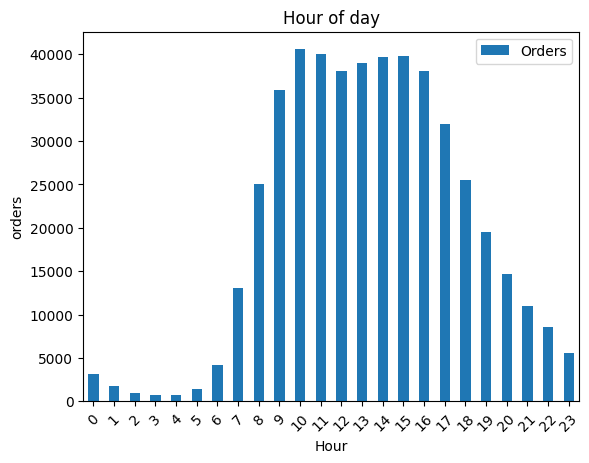

In [36]:
iodfg=iodf.groupby("order_hour_of_day")["order_id"].count()
iodfg=iodfg.reset_index()
iodfg.columns=["Hour","Orders"]
print(iodfg.value_counts().sort_index())

iodfg.plot(title="Hour of day",
         x="Hour",
         y="Orders",
         kind="bar",
         xlabel="Hour",
         ylabel="orders",
          rot=45)
plt.show()


Escribe aquí tus conclusiones

La columna de 'order_hour_of_day' tiene los valores correctos.las horas pico de consumo estan entre 9 y 3pm

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

Hour  Users
0     3180     1
1     1763     1
2     989      1
3     770      1
4     765      1
5     1371     1
6     4215     1
7     13043    1
8     25024    1
9     35896    1
10    40578    1
11    40032    1
12    38034    1
13    39007    1
14    39631    1
15    39789    1
16    38112    1
17    31930    1
18    25510    1
19    19547    1
20    14624    1
21    11019    1
22    8512     1
23    5611     1
dtype: int64


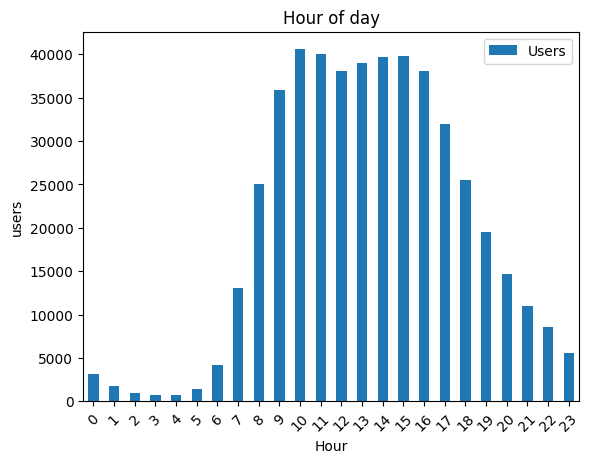

In [37]:
iodfg2=iodf.groupby("order_hour_of_day")["user_id"].count()
iodfg2=iodfg2.reset_index()
iodfg2.columns=["Hour","Users"]
print(iodfg2.value_counts().sort_index())

iodfg2.plot(title="Hour of day",
         x="Hour",
         y="Users",
         kind="bar",
         xlabel="Hour",
         ylabel="users",
          rot=45)
plt.show()

Escribe aquí tus conclusiones

La hora con mayor número de usuarios realizando ordenes es las 9am.

### [A3] ¿Qué día de la semana compran víveres las personas?

Day  Orders
0    84090     1
1    82185     1
2    65833     1
3    60897     1
4    59810     1
5    63488     1
6    62649     1
dtype: int64


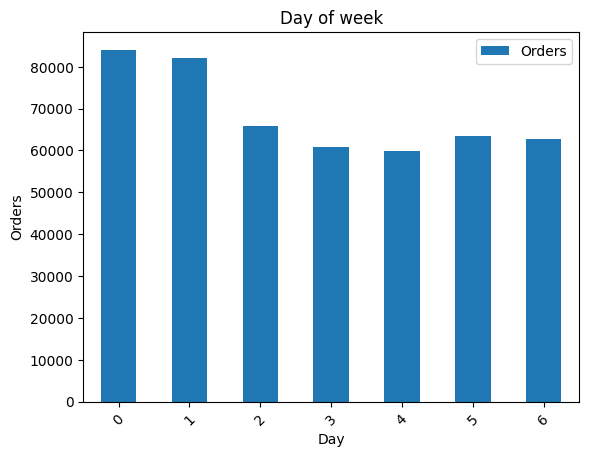

In [38]:
iodfg3=iodf.groupby("order_dow")["order_id"].count()
iodfg3=iodfg3.reset_index()
iodfg3.columns=["Day","Orders"]
print(iodfg3.value_counts().sort_index())

iodfg3.plot(title="Day of week",
         x="Day",
         y="Orders",
         kind="bar",
         xlabel="Day",
         ylabel="Orders",
          rot=45)
plt.show()

Escribe aquí tus conclusiones
El domingo es el día de la semana con mas ordenes realizadas, sin embargo los dás a lo largo de la semana parecen tener un volumen similar de transacciones.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [39]:
avg_dspo=iodf["days_since_prior_order"].mean()
max_dspo=iodf["days_since_prior_order"].max()
min_dspo=iodf["days_since_prior_order"].min()
print("dias promedio ",avg_dspo.round(2))
print("maximo de dias ",max_dspo)
print("minimo de dias ",min_dspo)

dias promedio  11.1
maximo de dias  30.0
minimo de dias  0.0


<AxesSubplot:title={'center':'Días desde la ultima compra'}, xlabel='días', ylabel='frecuencia'>

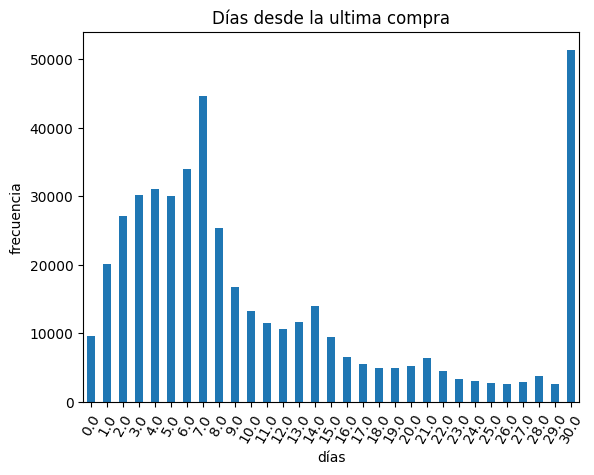

In [65]:
iodf_days=iodf.groupby("days_since_prior_order")["days_since_prior_order"].count()

iodf_days.plot(title="Días desde la ultima compra",
               kind="bar",
              xlabel="días",
              ylabel="frecuencia",
              rot=60)

podemos ver gracias a la grafica de barras un pico en los días desde la ultima orden donde tenemos una alta tasa de recompra para 3 días seguida de 7 días lo que nos indica un comportamiento de hábitos de consumo por parte de los usuarios

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

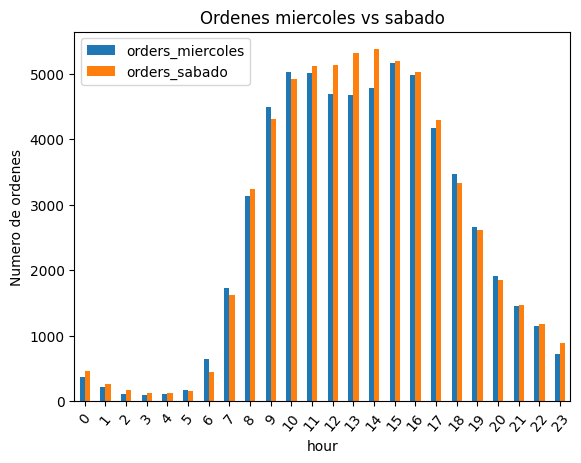

In [41]:
iodfm=iodf.query("order_dow==3")
iodfmh=iodfm.groupby("order_hour_of_day")["order_id"].count()
iodfmh=iodfmh.reset_index()
iodfmh.columns=["hour","orders_miercoles"]

iodfs=iodf.query("order_dow==6")
iodfsh=iodfs.groupby("order_hour_of_day")["order_id"].count()
iodfsh=iodfsh.reset_index()
iodfsh.columns=["hour","orders_sabado"]

iodfdh=iodfmh.merge(iodfsh,
                   on="hour",
                   suffixes=("1","2"))
cols=["orders_miercoles","orders_sabado"]
iodfdh.plot(title="Ordenes miercoles vs sabado",
           x="hour",
           y=cols,
           kind="bar",
            rot=50,
            ylabel="Numero de ordenes"
           )
plt.show()


 """Podemos ver que los dos días tienen un comportamiento similar sin embargo durante las horas 11-15 es cuando más diferencia hay teniendo un numero mayor de ordenes durante los dias sabado"""

Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
iodf_p=iodf.groupby("user_id")["order_id"].count()
iodf_p=iodf_p.reset_index()
iodf_p.columns=["user_id","numero_ordenes"]

iodf_p2=iodf_p.groupby("numero_ordenes")["user_id"].count()
iodf_p2=iodf_p2.reset_index()
iodf_p2.columns=["numero_ordenes","numero_usuarios"]

print(iodf_p2)

    numero_ordenes  numero_usuarios
0                1            55357
1                2            36508
2                3            21547
3                4            13498
4                5             8777
5                6             6012
6                7             4240
7                8             3019
8                9             2152
9               10             1645
10              11             1308
11              12              947
12              13              703
13              14              512
14              15              437
15              16              263
16              17              184
17              18              121
18              19               85
19              20               52
20              21               22
21              22               23
22              23               19
23              24                3
24              25                1
25              26                1
26              28          

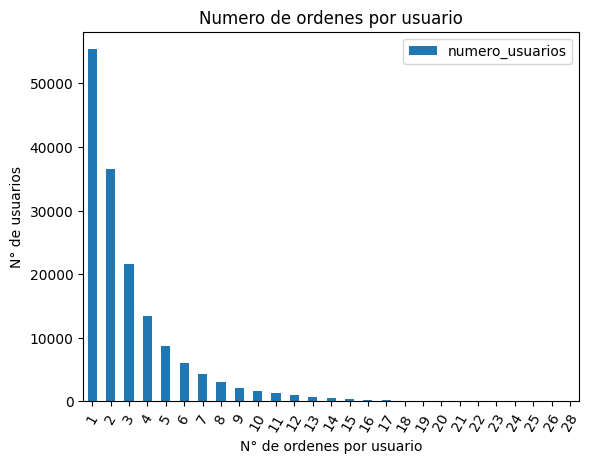

In [44]:
iodf_p2.plot(title="Numero de ordenes por usuario",
            kind="bar",
            x="numero_ordenes",
            y="numero_usuarios",
             xlabel="N° de ordenes por usuario",
             ylabel="N° de usuarios",
             rot=60
            )
plt.show()

Escribe aquí tus conclusiones

La mayoria de los usuarios realizan solo una orden a lo mucho 2. esto nos describe de manera perfecta lo dificil que es mantener clientes y pueden haber dos razones. 1.- han tenido un creicimiento reciente significante o, 2.- hay problemas durante la experiencia de venta que no son del agrado del consumidor

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
rank_order = opdf["product_id"].value_counts().reset_index()
rank_order.columns = ["product_id", "numero_ordenes"]
rank_order_sorted= rank_order.head(20)

final_orders=rank_order_sorted.merge(pdf,on="product_id",how="left")
final_orders=final_orders.drop(["aisle_id","department_id"],axis=1)
final_orders=final_orders[['product_id', 'product_name', 'numero_ordenes']]
print(final_orders)

    product_id              product_name  numero_ordenes
0        24852                    BANANA           66050
1        13176    BAG OF ORGANIC BANANAS           53297
2        21137      ORGANIC STRAWBERRIES           37039
3        21903      ORGANIC BABY SPINACH           33971
4        47209      ORGANIC HASS AVOCADO           29773
5        47766           ORGANIC AVOCADO           24689
6        47626               LARGE LEMON           21495
7        16797              STRAWBERRIES           20018
8        26209                     LIMES           19690
9        27845        ORGANIC WHOLE MILK           19600
10       27966       ORGANIC RASPBERRIES           19197
11       22935      ORGANIC YELLOW ONION           15898
12       24964            ORGANIC GARLIC           15292
13       45007          ORGANIC ZUCCHINI           14584
14       39275       ORGANIC BLUEBERRIES           13879
15       49683            CUCUMBER KIRBY           13675
16       28204        ORGANIC F

Escribe aquí tus conclusiones

podemos darnos cuenta que de la lista de los 20 productos mas vendidos 15 son orgánicos.Esto nos da un perfil del consumidor muy marcado

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [46]:
#Hago un df dodne junto instacart y order products para poder obtener el numero de  productos por orden
mp=iodf.merge(opdf,on="order_id",how="left")
#print(mp.info())

#Saco la cuenta de cuantos produtos son por orden
ppo=mp.groupby("order_id")["product_id"].count()
ppo=ppo.reset_index()
ppo.columns=["order_id","numero_productos"]

#ahora tengo el df con el numero de productos por orden y su frecuencia en el df
productos=ppo.groupby("numero_productos")["numero_productos"].count().reset_index(name="frecuencia")
productos=productos.sort_values(by="frecuencia",ascending=False)

#quise poner el top 5 porque me di cuenta que representan la mayoria de las ordenes
top5=productos.head(5)
total_top5=top5["frecuencia"].sum()
total_ordenes=productos["frecuencia"].sum()
porcentaje_top5=((total_top5/total_ordenes).round(2))*100
print("Total ordenes: ",total_ordenes)
print("de las cuales ",total_top5,"estan en el top 5")
print("representando :",porcentaje_top5,"% del total de ordenes")
print("donde el usuario adquirio entre 3 y 7 productos por orden")

#hice un df solamente para la grafica porque la poca frecuencia en el limite mayor del eje x no dejaba representar la congestion en el limite menor del mismo
productos_lim=productos.query("numero_productos<50 and numero_productos>0").sort_values(by="numero_productos",ascending=True)






Total ordenes:  478952
de las cuales  154543 estan en el top 5
representando : 32.0 % del total de ordenes
donde el usuario adquirio entre 3 y 7 productos por orden


<AxesSubplot:title={'center':'Numero de productos por pedido'}, xlabel='numero_productos', ylabel='frecuencia'>

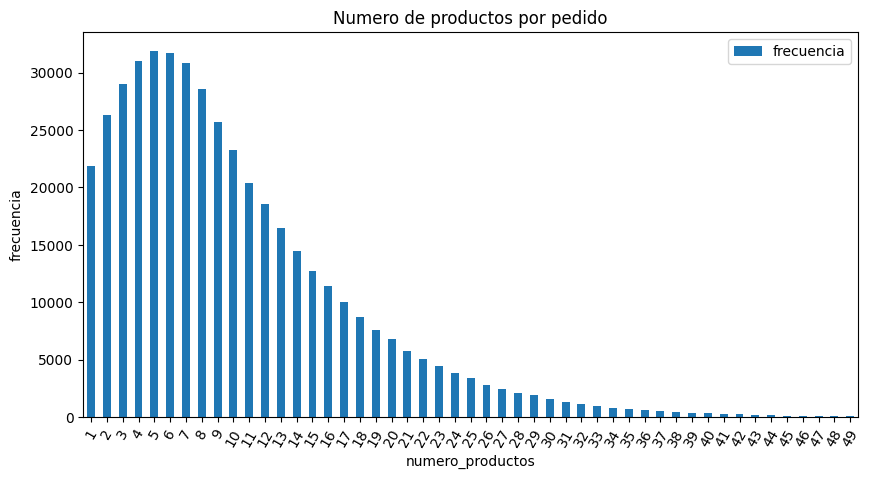

In [47]:
productos_lim.plot(title="Numero de productos por pedido",
    x="numero_productos",
              y="frecuencia",
              kind="bar",
              figsize=[10,5],
              rot=60,
              xlim=[0,50],
                  ylabel="frecuencia")

Escribe aquí tus conclusiones

El 32% de las compras incluyeron de 3 a 7 articulos

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [66]:
#filtro el df con solo los valores resultantes a 1 quitando asi las primeras compras
opdf_f=opdf.query("reordered==1")

#creo el df con dos columnas: 1.- product id y 2.- frecuencia de compra
opdf_f_prod=opdf_f.groupby("product_id")["product_id"].count().reset_index(name="frecuencia").sort_values(by="frecuencia",ascending=False).head(20)

#consigo el nombre del producto
top20=opdf_f_prod.merge(pdf,on="product_id",how="left")
top20=top20.drop(["aisle_id","department_id"],axis=1)
top20=top20[['product_id', 'product_name', 'frecuencia']]



print(top20)

    product_id              product_name  frecuencia
0        24852                    BANANA       55763
1        13176    BAG OF ORGANIC BANANAS       44450
2        21137      ORGANIC STRAWBERRIES       28639
3        21903      ORGANIC BABY SPINACH       26233
4        47209      ORGANIC HASS AVOCADO       23629
5        47766           ORGANIC AVOCADO       18743
6        27845        ORGANIC WHOLE MILK       16251
7        47626               LARGE LEMON       15044
8        27966       ORGANIC RASPBERRIES       14748
9        16797              STRAWBERRIES       13945
10       26209                     LIMES       13327
11       22935      ORGANIC YELLOW ONION       11145
12       24964            ORGANIC GARLIC       10411
13       45007          ORGANIC ZUCCHINI       10076
14       49683            CUCUMBER KIRBY        9538
15       28204        ORGANIC FUJI APPLE        8989
16        8277  APPLE HONEYCRISP ORGANIC        8836
17       39275       ORGANIC BLUEBERRIES      

Escribe aquí tus conclusiones

se puede ver aqui que seguimos teniendoo 15 productos organicos en la lsita del top20 para ordenes que no son las primeras lo cual reafirma la teoria del perfil de consumidor enfocado a los productos organicos.


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

count    45573.000000
mean         0.386707
std          0.272132
min          0.000000
25%          0.166667
50%          0.408163
75%          0.575758
max          1.000000
Name: promedio_reorden, dtype: float64


<AxesSubplot:title={'center':'promedio reorden productos'}, ylabel='Frequency'>

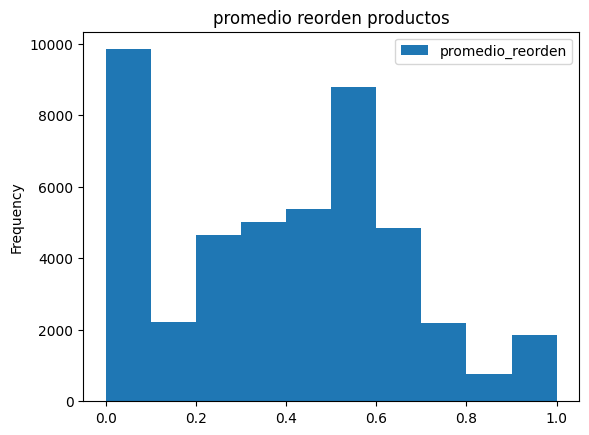

In [82]:
opdf_r=opdf.groupby("product_id")["reordered"].mean().reset_index(name="promedio_reorden")
print(opdf_r["promedio_reorden"].describe())
opdf_r.plot(kind="hist",
           x="product_id",
           y="promedio_reorden",
           title="promedio reorden productos",
           xlabel="productos",
           ylabel="promedio reorden")

Escribe aquí tus conclusiones

nos podemos da cuenta que el promedio de la base de datos es de 39% y tenemos una distribución cargada al 0 donde los productos no se vuelven a vender al mismo usuario o se venden de nuevo en un 60%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [51]:
#traigo la columna de user_id usando .merge() entre order_products y instacart_orders
usuarios=opdf.merge(iodf,on="order_id",how="left")

#creo un df donde la información se agrupe por user_id
usuarios_ord = usuarios.groupby("user_id").agg(
    productos_comprados=('product_id', 'count'),
    productos_reordenados=('reordered', 'sum'),
        
).reset_index()
#creo la columna con el coeficiente de reorden
usuarios_ord["%_reorden"]=((usuarios_ord["productos_reordenados"]/usuarios_ord["productos_comprados"])*100).round(2)
print(usuarios_ord["%_reorden"].describe())

count    149626.000000
mean         49.485318
std          29.268606
min           0.000000
25%          27.270000
50%          50.000000
75%          72.410000
max         100.000000
Name: %_reorden, dtype: float64


In [52]:
print(usuarios_ord.head())

   user_id  productos_comprados  productos_reordenados  %_reorden
0        2                   26                      1       3.85
1        4                    2                      0       0.00
2        5                   12                      8      66.67
3        6                    4                      0       0.00
4        7                   14                     13      92.86


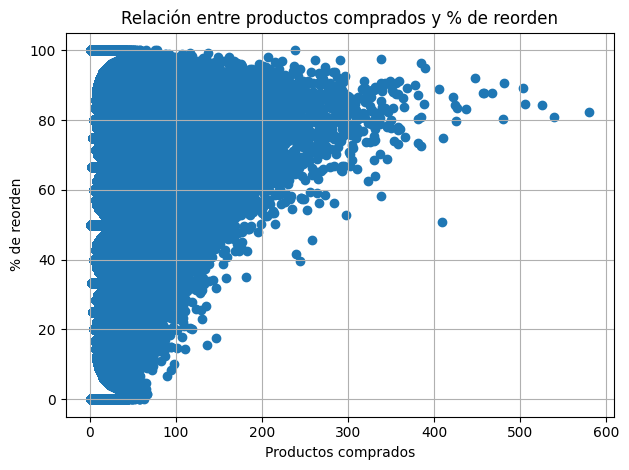

In [53]:
#creamos una grafica de dispersion para comprender el comportamiento de compras de los usuarios

plt.scatter(usuarios_ord['productos_comprados'], usuarios_ord['%_reorden'])
plt.xlabel('Productos comprados')
plt.ylabel('% de reorden')
plt.title('Relación entre productos comprados y % de reorden')
plt.grid(True)
plt.tight_layout()

plt.show()

<AxesSubplot:title={'center':'porcentaje reorden'}, ylabel='Frequency'>

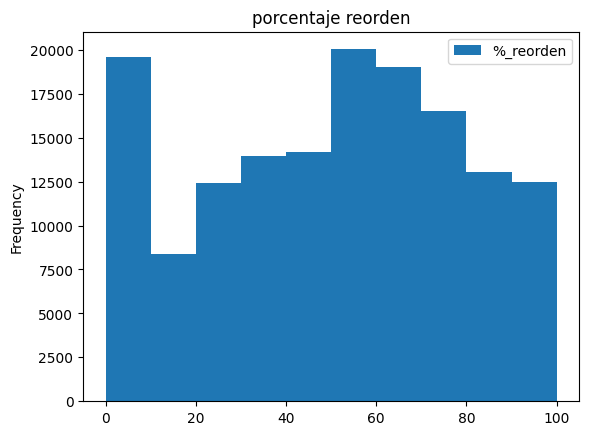

In [107]:
usuarios_ord.plot(kind="hist",
                  y='%_reorden',
                 ylabel="% reorden",
                 title="porcentaje reorden")

Escribe aquí tus conclusiones

podemos darnos cuenta que las ordenes de productos de los usarios consisten en un 49% de productos reordenados dentro de su total de compras lo cual nos dice que tenemos un buen indice de lealtad de consumo. en la grafica de dispersion nos muestra que el porcentaje de reorden no está extrictamente relacionado con la cantidad de productos ordenados teniendo asi un numero grande de usuarios con pocas compras pero con un consumo recurrente de los mismos productos. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [97]:
cart_1=opdf.query("add_to_cart_order==1")
products_rank=cart_1.groupby(by="product_id")['add_to_cart_order'].sum().reset_index(name="score")
products_rank=products_rank.sort_values(by="score",ascending=False)
products_rank=products_rank.head(20).reset_index().drop("index",axis=1)
products_final=products_rank.merge(pdf,on="product_id",how="left")
products_final=products_final.drop(["aisle_id","department_id"],axis=1)
products_final=products_final[["product_id","product_name","score"]]
print(products_final)

    product_id                 product_name  score
0        24852                       BANANA  15562
1        13176       BAG OF ORGANIC BANANAS  11026
2        27845           ORGANIC WHOLE MILK   4363
3        21137         ORGANIC STRAWBERRIES   3946
4        47209         ORGANIC HASS AVOCADO   3390
5        21903         ORGANIC BABY SPINACH   3336
6        47766              ORGANIC AVOCADO   3044
7        19660                 SPRING WATER   2336
8        16797                 STRAWBERRIES   2308
9        27966          ORGANIC RASPBERRIES   2024
10       44632   SPARKLING WATER GRAPEFRUIT   1914
11       49235          ORGANIC HALF & HALF   1797
12       47626                  LARGE LEMON   1737
13         196                         SODA   1733
14       38689     ORGANIC REDUCED FAT MILK   1397
15       26209                        LIMES   1370
16       12341                HASS AVOCADOS   1340
17        5785  ORGANIC REDUCED FAT 2% MILK   1310
18       27086                 

Escribe aquí tus conclusiones

podemos darnos cuenta de la prevalencia de productos organicos en casi todos los toips de productos basados en distintos parámetros lo que nos confirma una aceptacion por parte del mercado

### Conclusion general del proyecto:

In [56]:
"""El análisis de los datos de órdenes y productos revela patrones consistentes en el comportamiento de los consumidores. Las compras se concentran principalmente entre las 9:00 a.m. y las 3:00 p.m., sin variaciones significativas entre los distintos días de la semana. No obstante, los días domingo y lunes presentan el mayor volumen de consumo, lo cual sugiere una tendencia a realizar pedidos al inicio de la semana, posiblemente como parte de la planificación semanal del hogar. En cuanto a la frecuencia de compra, la mayoría de los usuarios realiza entre una y cinco órdenes, lo que indica una base de clientes con participación activa pero no excesiva. Los productos más vendidos están claramente orientados al consumo de alimentos saludables, con una fuerte presencia de productos orgánicos como frutas, vegetales y lácteos, lo cual refleja una tendencia hacia hábitos de consumo más conscientes. El tamaño de las órdenes es moderado, con la mayoría de los pedidos incluyendo entre uno y diez productos. A esto se suma el hallazgo de que una gran parte de las compras corresponde a reordenes, es decir, productos que los clientes ya han adquirido en ocasiones anteriores. Este comportamiento señala un alto nivel de fidelidad hacia ciertos productos y reafirma la importancia de ofrecer una experiencia de compra que facilite la repetición de órdenes previas. Por último, se identificó una relación relevante entre los productos más vendidos y su posición en el carrito de compras. Los artículos con mayor volumen de ventas tienden a ser los primeros en ser añadidos, lo que sugiere una alta recordación o preferencia por parte de los usuarios. En conjunto, estos hallazgos permiten concluir que el perfil del consumidor es el de un cliente recurrente, con hábitos estables, que valora la calidad y salud en sus decisiones de compra, y que mantiene un comportamiento de consumo predecible tanto en horarios como en preferencias de productos."""

'El análisis de los datos de órdenes y productos revela patrones consistentes en el comportamiento de los consumidores. Las compras se concentran principalmente entre las 9:00 a.m. y las 3:00 p.m., sin variaciones significativas entre los distintos días de la semana. No obstante, los días domingo y lunes presentan el mayor volumen de consumo, lo cual sugiere una tendencia a realizar pedidos al inicio de la semana, posiblemente como parte de la planificación semanal del hogar. En cuanto a la frecuencia de compra, la mayoría de los usuarios realiza entre una y cinco órdenes, lo que indica una base de clientes con participación activa pero no excesiva. Los productos más vendidos están claramente orientados al consumo de alimentos saludables, con una fuerte presencia de productos orgánicos como frutas, vegetales y lácteos, lo cual refleja una tendencia hacia hábitos de consumo más conscientes. El tamaño de las órdenes es moderado, con la mayoría de los pedidos incluyendo entre uno y diez p